In [25]:
#import required libraries for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# read the csv and display basic information about the data
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

In [386]:
#profiling the data
!pip install pandas-profiling
import pandas_profiling 

profile = pandas_profiling.ProfileReport(df)

You should consider upgrading via the 'c:\users\csuftitan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [387]:
# exporting  profile to html
profile.to_file("profile_report.html")

In [19]:
#display first five records
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
# display the number of rows and columns
df.shape

(16613, 19)

In [16]:
#check for duplicates
df.duplicated().sum()

3

In [17]:
#display duplicate rows
df[df.duplicated(keep=False)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
547,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
3950,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
14982,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984


In [21]:
#drop duplicate records
df.drop_duplicates(inplace=True)
df.shape

(16610, 19)

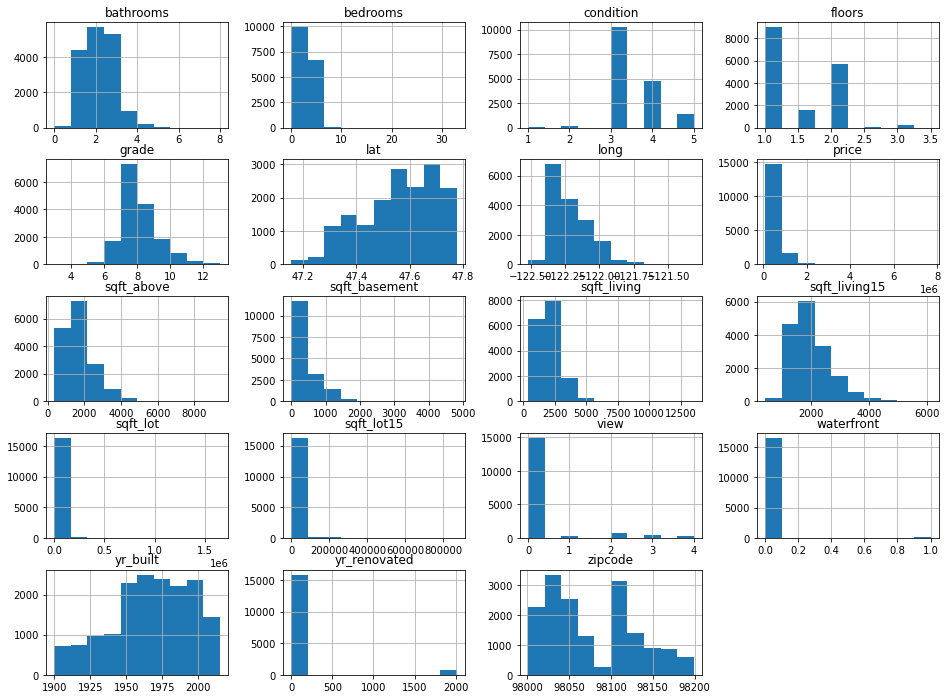

In [274]:
# check the distributions of all the variables
df.hist(bins=10, figsize=(16,12))
plt.show()

In [23]:
#find the correlation values among varibles
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.297588,0.520181,0.700894,0.092406,0.278328,0.279747,0.405115,0.046739,0.662405,0.603299,0.329278,0.036889,0.134122,-0.046677,0.306882,0.015346,0.598532,0.080662
bedrooms,0.297588,1.000000,0.516642,0.559759,0.034423,0.204662,-0.001671,0.083803,0.033258,0.352096,0.451952,0.316294,0.162206,0.021875,-0.140029,-0.000625,0.112345,0.368836,0.029746
bathrooms,0.520181,0.516642,1.000000,0.760310,0.099703,0.502980,0.075108,0.203464,-0.093735,0.658079,0.684186,0.304083,0.485360,0.066945,-0.204228,0.024244,0.225808,0.578968,0.098211
sqft_living,0.700894,0.559759,0.760310,1.000000,0.179934,0.399161,0.115929,0.296102,-0.048381,0.767406,0.867276,0.458156,0.325525,0.066564,-0.182919,0.061403,0.221773,0.753775,0.186574
sqft_lot,0.092406,0.034423,0.099703,0.179934,1.000000,0.025031,0.021205,0.067864,-0.019348,0.130442,0.197070,0.009200,0.091140,0.005156,-0.127774,-0.089431,0.228601,0.159724,0.719523
floors,0.278328,0.204662,0.502980,0.399161,0.025031,1.000000,0.034480,0.055728,-0.221416,0.461520,0.578836,-0.232524,0.418308,0.035428,-0.081384,0.034144,0.164825,0.328633,0.021085
waterfront,0.279747,-0.001671,0.075108,0.115929,0.021205,0.034480,1.000000,0.403306,0.010819,0.090416,0.083431,0.083666,-0.015994,0.084975,0.032570,-0.013096,-0.042469,0.093247,0.031508
view,0.405115,0.083803,0.203464,0.296102,0.067864,0.055728,0.403306,1.000000,0.040238,0.264756,0.180035,0.272729,-0.036368,0.097999,0.088223,0.004064,-0.083367,0.293323,0.063307
condition,0.046739,0.033258,-0.093735,-0.048381,-0.019348,-0.221416,0.010819,0.040238,1.000000,-0.124867,-0.147332,0.165976,-0.317560,-0.075426,-0.002757,-0.017505,-0.109538,-0.090751,-0.018623
grade,0.662405,0.352096,0.658079,0.767406,0.130442,0.461520,0.090416,0.264756,-0.124867,1.000000,0.762183,0.179058,0.434290,0.023419,-0.190023,0.112711,0.209409,0.737717,0.132677


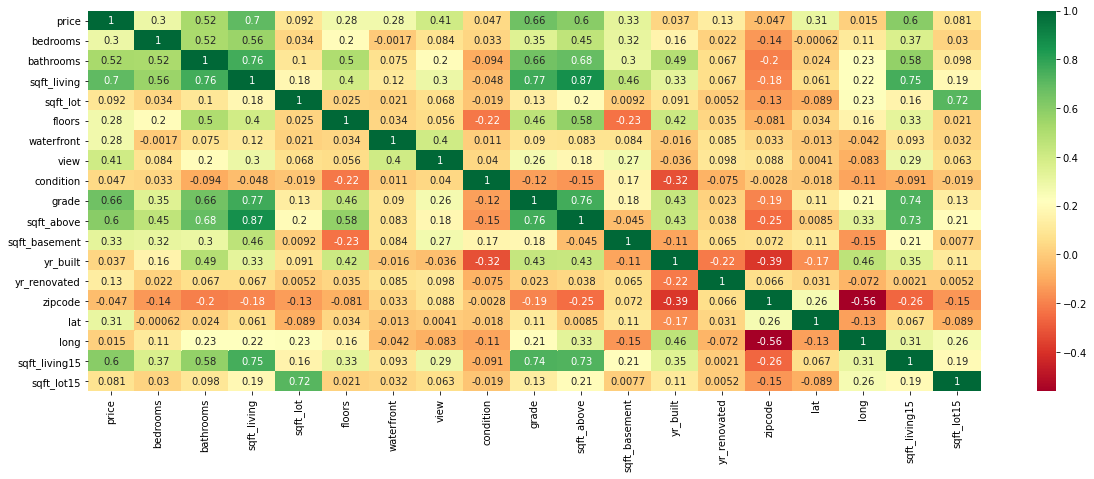

In [27]:
#draw a heatmap based on correlation values
fig, ax = plt.subplots(figsize=(20,7))  
sns.heatmap(corr, annot = True, cmap="RdYlGn")

# Considering all the columns  

In [300]:
#considering all variables except "Dataset" as input variables 
X=df.drop('price', axis=1)
y=df['price']

In [370]:
#split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state=8)
X_train.shap

(15779, 18)

In [371]:
#train the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [372]:
#test the model on test data
y_pred = lr.predict(X_test)
y_pred

array([ 893600.56881308,  455137.67152053,  410520.02212441,
        222965.74729018,  354438.47763223,  900145.59611654,
        410758.69657673,  389657.15956958,  520037.96485601,
        405441.9407617 ,  655680.01512141,  461534.92181298,
       1140508.81795542,  653599.77122905,  719275.39255613,
        327751.66872808,  168100.27153823,  380219.42549307,
        636283.63497699,  402465.27570998,  500131.69281328,
        533329.75277825,  756387.64257611,  215344.85314855,
        347510.47523898,  432679.23779061,  757317.47051251,
        739010.44814229,  265430.06255134,  120062.3094023 ,
       1281750.96334353,  699069.51632998,  725819.83362281,
        331628.73466494, 1167980.88503938,  489310.50424119,
        837684.07529937,  266111.92159697,  429008.91474697,
        866958.90025106,  561004.70762019,  462760.28657168,
        470518.61800741,  612520.14837367,  291889.46774293,
        577469.45895661,  594870.6706727 ,  267929.74136114,
        136949.3261553 ,

In [373]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

119170.88347067173
30415150280.0259
174399.39873756992


In [374]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [375]:
#X_testnew = test_new.drop(columns= ['zipcode', 'long'])
#predictions = lr.predict(X_testnew)
predictions = lr.predict(test_new)
predictions

array([1740404.71043842,  693223.79804892,  457459.50226958, ...,
        110635.31897831,  359757.83663218,  113645.74624216])

In [344]:
res = pd.DataFrame(predictions)
#res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_LP.csv") 

# Let's do some parameter tuning based on correlation values!

In [482]:
# choose input and output variables
X=df.drop(columns= ['price', 'zipcode', 'condition', 'long', 'sqft_living15', 'sqft_above', 'bathrooms', 'sqft_lot15', 'sqft_basement', 'view','yr_renovated'])
#X = df[['bathrooms', 'sqft_living', 'grade']]
y = df['price']

In [486]:
#split the dataset to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=8)
X_train.shape

(15779, 8)

In [487]:
#train the model
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [488]:
#test the model on test data
y_pred = lr1.predict(X_test)

In [489]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

125970.16059681016
33560485022.0281
183195.21015034235


In [490]:
# unseen data
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [492]:
# feature selection
X_test_new=test_new.drop(columns= [ 'zipcode', 'condition', 'long', 'sqft_living15', 'sqft_above', 'bathrooms', 'sqft_lot15', 'sqft_basement', 'view','yr_renovated'])

In [493]:
# test the model on test data
y_pred_new = lr1.predict(X_test_new)

In [494]:
# predicted values
y_pred_new

array([1585733.97447622,  746299.67297933,  473971.72573387, ...,
        177868.09648236,  365574.5337614 ,  180917.65581741])

In [495]:
res = pd.DataFrame(predictions)
#res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_LP_New.csv") 

# That's it for this project!! Enjoy!!